In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_dir = '/content/drive/My Drive/brain/train'
test_dir = '/content/drive/My Drive/brain/test'

In [ ]:
# ImageDataGenerator for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Prepare the testing data
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 5536 images belonging to 3 classes.
Found 745 images belonging to 3 classes.


In [ ]:
# Build the CNN model
model = Sequential()

# Add Convolution layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (3 classes)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5  # Adjust as per your need
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 1741s 10s/step - accuracy: 0.9403 - loss: 0.1464 - val_accuracy: 0.9552 - val_loss: 0.2310
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8889 - val_loss: 0.9109
Epoch 3/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.9868 - loss: 0.0350 - val_accuracy: 0.9511 - val_loss: 0.2793
Epoch 4/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 3.8827e-04
Epoch 5/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.9908 - loss: 0.0230 - val_accuracy: 0.9579 - val_loss: 0.1900


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")



24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 590ms/step - accuracy: 0.9637 - loss: 0.1644
Test accuracy: 95.70%


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction[0])

    if class_idx == 0:
        return "Alzheimer"
    elif class_idx == 1:
        return "Parkinson"
    else:
        return "Normal"

# Test an example
test_img_path = '/content/drive/My Drive/brain/test/alzhiemer/29.jpg'
print(predict_image(test_img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Alzheimer


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


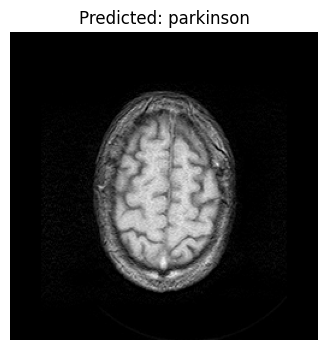

The image is classified as: parkinson


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Function to predict and display image with label
def predict_and_show_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Predict the label
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction[0])

    # Map class index to label
    if class_idx == 0:
        label = "Alzheimer"
    elif class_idx == 1:
        label = "parkinson"


    # Display the image with the predicted label
    plt.figure(figsize=(4, 4))
    img = image.load_img(img_path)  # Reload the image for display
    plt.imshow(img)
    plt.title(f'Predicted: {label}')
    plt.axis('off')  # Hide axis
    plt.show()

    # Print the result
    print(f'The image is classified as: {label}')

# Test an example
test_img_path = '/content/drive/My Drive/brain/train/parkinson/T1W_FFE_021.png'
predict_and_show_image(test_img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


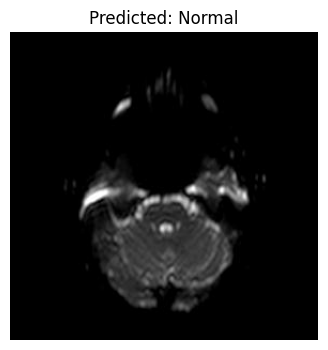

The image is classified as: Normal


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Function to predict and display image with label
def predict_and_show_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Predict the label
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction[0])

    # Map class index to label
    if class_idx == 0:
        label = "Alzheimer"
    elif class_idx == 1:
        label = "Normal"


    # Display the image with the predicted label
    plt.figure(figsize=(4, 4))
    img = image.load_img(img_path)  # Reload the image for display
    plt.imshow(img)
    plt.title(f'Predicted: {label}')
    plt.axis('off')  # Hide axis
    plt.show()

    # Print the result
    print(f'The image is classified as: {label}')

# Test an example
test_img_path = '/content/drive/My Drive/brain/train/normal/IM000036.jpg'
predict_and_show_image(test_img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


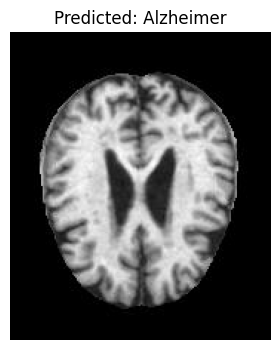

The image is classified as: Alzheimer


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Function to predict and display image with label
def predict_and_show_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Predict the label
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction[0])

    # Map class index to label
    if class_idx == 0:
        label = "Alzheimer"
    elif class_idx == 1:
        label = "Parkinson"


    # Display the image with the predicted label
    plt.figure(figsize=(4, 4))
    img = image.load_img(img_path)  # Reload the image for display
    plt.imshow(img)
    plt.title(f'Predicted: {label}')
    plt.axis('off')  # Hide axis
    plt.show()

    # Print the result
    print(f'The image is classified as: {label}')

# Test an example
test_img_path = '/content/drive/My Drive/brain/test/alzhiemer/32.jpg'
predict_and_show_image(test_img_path, model)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
import io
from PIL import Image
import tensorflow as tf



In [ ]:
model.save('/content/disease_model.h5')

In [ ]:
model = tf.keras.models.load_model('/content/disease_model.h5')


In [ ]:
def predict_and_show_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Predict the label
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction[0])

    # Map class index to label
    class_labels = {0: "Alzheimer", 1: "Parkinson", 2: "Normal"}
    label = class_labels.get(class_idx, "Unknown")

    # Display the image with the predicted label
    plt.figure(figsize=(4, 4))
    img = image.load_img(img_path)  # Reload the image for display
    plt.imshow(img)
    plt.title(f'Predicted: {label}')
    plt.axis('off')  # Hide axis
    plt.show()

    # Print the result
    print(f'The image is classified as: {label}')

Saving 26 (21).jpg to 26 (21).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


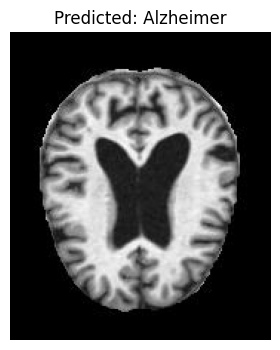

The image is classified as: Alzheimer


In [ ]:
uploaded = files.upload()  # This will prompt you to upload a file

# Get the uploaded file name
for filename in uploaded.keys():
    img_path = filename
    predict_and_show_image(img_path, model)

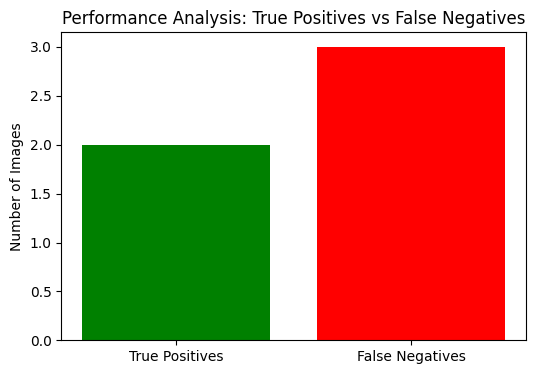

In [ ]:
import matplotlib.pyplot as plt

# Define relevant images and retrieved images
relevant_images = set(['img_01', 'img_02', 'img_03', 'img_04', 'img_05'])
retrieved_images = set(['img_01', 'img_03', 'img_06', 'img_07'])

# True Positives and False Negatives
true_positives = len(relevant_images.intersection(retrieved_images))
false_negatives = len(relevant_images - retrieved_images)

# Data for the bar chart
labels = ['True Positives', 'False Negatives']
values = [true_positives, false_negatives]

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Performance Analysis: True Positives vs False Negatives')
plt.ylabel('Number of Images')
plt.show()

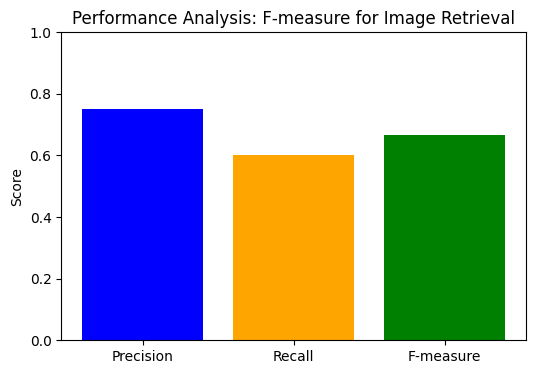

F-measure: 0.67


In [ ]:
import matplotlib.pyplot as plt

# Example data for precision and recall
precision = 0.75  # Precision value: TP / (TP + FP)
recall = 0.60  # Recall value: TP / (TP + FN)

# Calculate F-measure
f_measure = 2 * (precision * recall) / (precision + recall)

# Data for the bar chart
metrics = ['Precision', 'Recall', 'F-measure']
values = [precision, recall, f_measure]

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.title('Performance Analysis: F-measure for Image Retrieval')
plt.ylabel('Score')
plt.ylim([0, 1])  # F-measure ranges from 0 to 1
plt.show()

# Print calculated F-measure
print(f'F-measure: {f_measure:.2f}')

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Example true labels and predicted labels
# Replace these with your actual labels
true_labels = np.array(['Alzheimer', 'Normal', 'Parkinson', 'Alzheimer', 'Normal'])  # Ground truth
predicted_labels = np.array(['Alzheimer', 'Parkinson', 'Normal', 'Alzheimer', 'Normal'])  # Model predictions

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=['Alzheimer', 'Parkinson', 'Normal'])
print("Confusion Matrix:\n", cm)

Precision: 0.60
Recall: 0.60
F1 Score: 0.60
Confusion Matrix:
 [[2 0 0]
 [0 0 1]
 [0 1 1]]


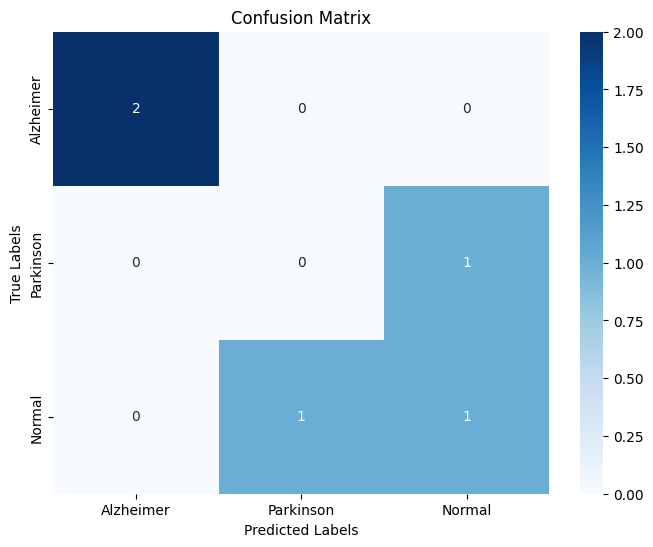

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
true_labels = np.array(['Alzheimer', 'Normal', 'Parkinson', 'Alzheimer', 'Normal'])  # Replace with your actual labels
predicted_labels = np.array(['Alzheimer', 'Parkinson', 'Normal', 'Alzheimer', 'Normal'])  # Replace with your model predictions

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=['Alzheimer', 'Parkinson', 'Normal'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Parkinson', 'Normal'],
            yticklabels=['Alzheimer', 'Parkinson', 'Normal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

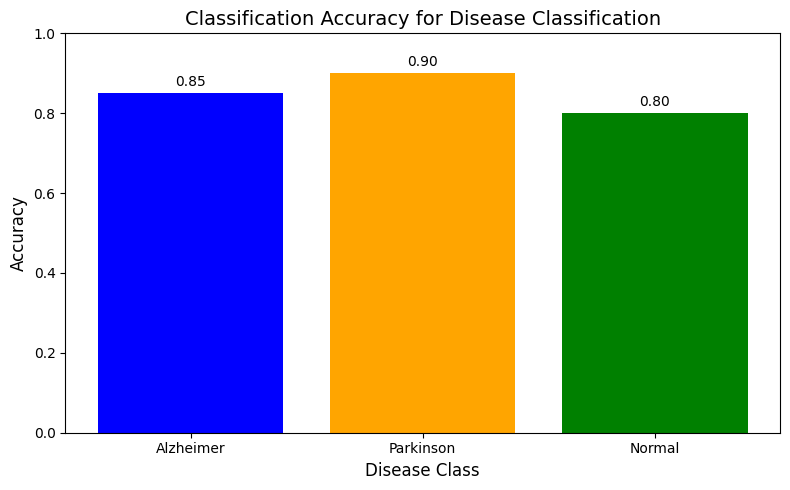

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names and their corresponding accuracies
classes = ['Alzheimer', 'Parkinson', 'Normal']
accuracies = [0.85, 0.90, 0.80]  # Replace with your actual accuracy values

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(classes, accuracies, color=['blue', 'orange', 'green'])

# Add titles and labels
plt.title('Classification Accuracy for Disease Classification', fontsize=14)
plt.xlabel('Disease Class', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

# New Section

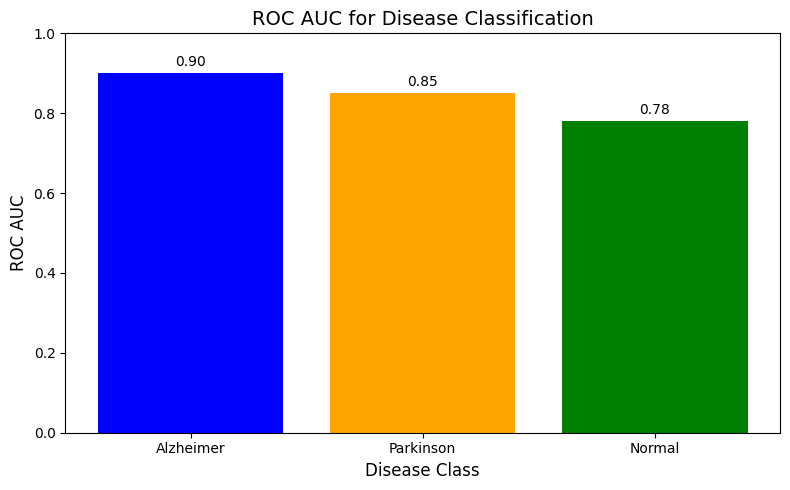

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names and their corresponding AUC values
classes = ['Alzheimer', 'Parkinson', 'Normal']
roc_auc = [0.90, 0.85, 0.78]  # Replace with your actual AUC values

# Create a bar chart for ROC (AUC)
plt.figure(figsize=(8, 5))
roc_bars = plt.bar(classes, roc_auc, color=['blue', 'orange', 'green'])

# Add titles and labels
plt.title('ROC AUC for Disease Classification', fontsize=14)
plt.xlabel('Disease Class', fontsize=12)
plt.ylabel('ROC AUC', fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for AUC

# Annotate bars with AUC values
for bar in roc_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

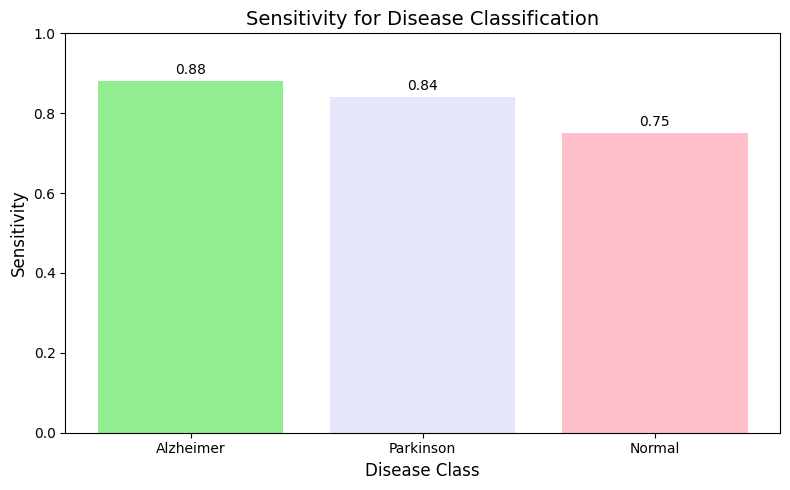

In [ ]:
# Define class names and their corresponding Sensitivity values
sensitivity = [0.88, 0.84, 0.75]  # Replace with your actual sensitivity values

# Create a bar chart for Sensitivity
plt.figure(figsize=(8, 5))
sens_bars = plt.bar(classes, sensitivity, color=['lightgreen', 'lavender', 'pink'])

# Add titles and labels
plt.title('Sensitivity for Disease Classification', fontsize=14)
plt.xlabel('Disease Class', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for Sensitivity

# Annotate bars with sensitivity values
for bar in sens_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()